In [101]:
# load hessian and variance and visualize their trends
folder_path = './generated_ind'

In [102]:
model_size = '125m'
model_name = 'opt'

In [103]:
ind_file_name_prefix = f'gen_{model_name}_{model_size}_'
var_file = ind_file_name_prefix + 'ind.pkl'
hessian_file = ind_file_name_prefix + 'hess_ind.pkl'
import os
var_file_path = os.path.join(folder_path, var_file)
hessian_file_path = os.path.join(folder_path, hessian_file)

In [104]:
import pickle

In [105]:
with open(var_file_path, 'rb') as f:
    var_ind = pickle.load(f)
with open(hessian_file_path, 'rb') as f:
    hess_ind = pickle.load(f)

In [106]:
import matplotlib.pyplot as plt

In [107]:
L, bit_pair = var_ind.shape
# dim: decoder layer, possible combinations

In [108]:
import random
# select n layers to visualize
n = 12
# b = 10
assert n <= L, "should n < L"
selected_indices = sorted(random.sample(range(L), n))
# selected_bit_indices = random.sample(range(bit_pair ), b)
# print(selected_indices, selected_bit_indices)
# selected_var_ind = var_ind[selected_indices, selected_bit_indices]
# selected_hess_ind = hess_ind[selected_indices, selected_bit_indices]
selected_var_ind = var_ind[selected_indices, :]
selected_hess_ind = hess_ind[selected_indices, :]

In [109]:
selected_var_ind.shape

(12, 36)

In [110]:
def plot_it(arr, label):
    # Define the number of layers and bitwidths
    L, n = arr.shape
    
    # Plot the array using imshow
    plt.imshow(arr, cmap='viridis', aspect='auto', interpolation='nearest', label=label)

    # Set the x and y axis labels
    plt.xlabel('Bitwidth')
    plt.ylabel('Layer Index')

    # Set the x and y axis ticks
    plt.xticks(range(n))
    plt.yticks(range(L))
    
    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()


In [115]:
selected_var_ind[:, 2].argsort()

array([ 0,  1, 11, 10,  9,  8,  6,  7,  5,  4,  3,  2])

In [116]:
selected_hess_ind[:, 2].argsort()

array([ 1,  9,  8, 10, 11,  7,  3,  6,  5,  0,  4,  2])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


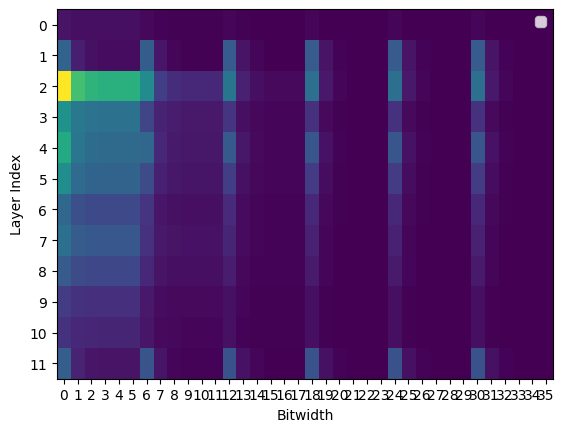

In [113]:
plot_it(selected_var_ind, 'var')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


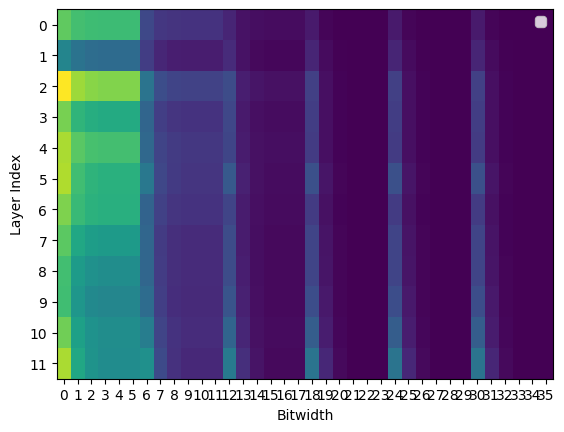

In [114]:
plot_it(selected_hess_ind, 'hess')